In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

print("All imports successful")

All imports successful


In [2]:
df = pd.read_csv('../../data/raw/listings.csv')
df['price'] = df['price'].str.replace(r'[^\d.]','',regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

In [3]:
features = ['neighbourhood_cleansed', 'accommodates', 'bedrooms', 
                   'beds', 'estimated_occupancy_l365d']
target = 'estimated_revenue_l365d'

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

print("Missing values in features:")
print(df[features].isna().sum())
print("\nMissing values in target:")
print(df[target].isna().sum())

(15187, 5)
(15187,)
Missing values in features:
neighbourhood_cleansed          0
accommodates                    0
bedrooms                      939
beds                         4491
estimated_occupancy_l365d       0
dtype: int64

Missing values in target:
4479


In [4]:
# Create working dataframe with only needed columns
df_clean = df[features + [target]].copy()

# Fill NaNs with median for ALL columns
df_clean = df_clean.fillna(df_clean.median())

# Verify clean
print("After cleaning:\n")
print(df_clean.isna().sum())  # Should all be 0

After cleaning:

neighbourhood_cleansed       0
accommodates                 0
bedrooms                     0
beds                         0
estimated_occupancy_l365d    0
estimated_revenue_l365d      0
dtype: int64


In [5]:
# Now split the CLEAN data
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (12149, 5)
y_train shape: (12149,)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained!")

Model trained!


In [7]:
predictions = model.predict(X_test)

# Check the output
print(f"Predictions shape: {predictions.shape}")
print(f"First 5 predictions: {predictions[:5]}")
print(f"First 5 actual values: {y_test.iloc[:5].values}")

Predictions shape: (3038,)
First 5 predictions: [8227.7471675  2824.67251571 6414.56881373 2054.37612485 7058.34846876]
First 5 actual values: [1560. 7077. 7077. 7077. 7200.]


In [8]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

print(coefficients)
print(f"\nIntercept (baseline): ${model.intercept_:.2f}")

                     Feature  Coefficient
0     neighbourhood_cleansed   -54.037047
1               accommodates   883.964813
2                   bedrooms   770.296391
3                       beds  1158.063995
4  estimated_occupancy_l365d   123.287316

Intercept (baseline): $4250131.74


In [9]:
# See the outliers
print(f"Max revenue in dataset: ${df['estimated_revenue_l365d'].max():,.0f}")
print(f"95th percentile: ${df['estimated_revenue_l365d'].quantile(0.95):,.0f}")

Max revenue in dataset: $3,900,000
95th percentile: $49,754


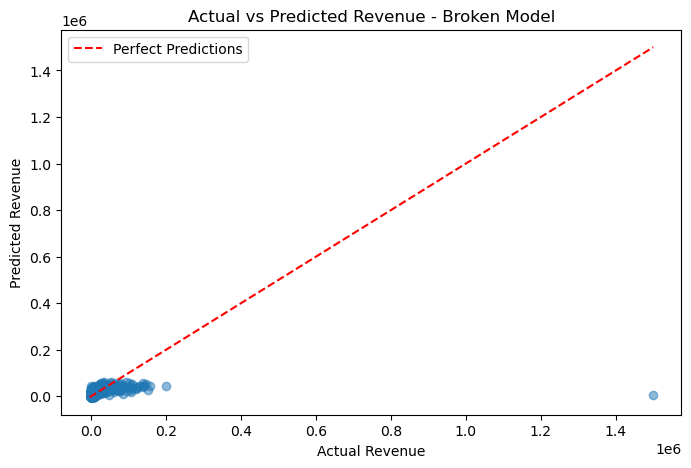

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue - Broken Model')

# Add diagonal line (perfect predictions)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Predictions')
plt.legend()
plt.show()

In [16]:
# Keep only realistic Airbnb revenue (under $100K/year)
df_clean = df[df['estimated_revenue_l365d'] < 100000].copy()

print(f"Original dataset: {len(df)} listings")
print(f"After filtering: {len(df_clean)} listings")
print(f"Removed: {len(df) - len(df_clean)} outliers")

Original dataset: 15187 listings
After filtering: 10577 listings
Removed: 4610 outliers


In [17]:
# Define features and target
feature_columns = ['neighbourhood_cleansed', 'accommodates', 'bedrooms', 
                   'beds', 'estimated_occupancy_l365d']
target_column = 'estimated_revenue_l365d'

# Select only needed columns
df_model = df_clean[feature_columns + [target_column]].copy()

# Fill NaNs with median
df_model = df_model.fillna(df_model.median())

# Verify clean
print("Missing values after cleaning:")
print(df_model.isna().sum())

Missing values after cleaning:
neighbourhood_cleansed       0
accommodates                 0
bedrooms                     0
beds                         0
estimated_occupancy_l365d    0
estimated_revenue_l365d      0
dtype: int64


In [18]:
# Create X and y from clean data
X = df_model[feature_columns]
y = df_model[target_column]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} listings")
print(f"Test set: {X_test.shape[0]} listings")

Training set: 8461 listings
Test set: 2116 listings


In [19]:
# Create and train new model
model_clean = LinearRegression()
model_clean.fit(X_train, y_train)

print("Clean model trained! ✅")

Clean model trained! ✅


In [20]:
# See what clean model learned
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_clean.coef_
})

print(coefficients)
print(f"\nIntercept (baseline): ${model_clean.intercept_:.2f}")

                     Feature  Coefficient
0     neighbourhood_cleansed   -50.880613
1               accommodates  1073.609558
2                   bedrooms  1514.649850
3                       beds   126.942135
4  estimated_occupancy_l365d   129.276946

Intercept (baseline): $3998487.14


In [21]:
# Simpler feature set - NO neighbourhood
feature_columns = ['accommodates', 'bedrooms', 'beds', 'estimated_occupancy_l365d']
target_column = 'estimated_revenue_l365d'

# Rebuild from df_clean
df_model = df_clean[feature_columns + [target_column]].copy()
df_model = df_model.fillna(df_model.median())

# Split
X = df_model[feature_columns]
y = df_model[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Check coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_simple.coef_
})
print(coefficients)
print(f"\nIntercept (baseline): ${model_simple.intercept_:.2f}")

                     Feature  Coefficient
0               accommodates  1127.915254
1                   bedrooms  1332.321266
2                       beds   150.980169
3  estimated_occupancy_l365d   129.720532

Intercept (baseline): $-7098.77


In [22]:
# Make predictions with clean model
predictions_clean = model_simple.predict(X_test)

# Check first 5
print(f"First 5 predictions: {predictions_clean[:5]}")
print(f"First 5 actual values: {y_test.iloc[:5].values}")

First 5 predictions: [12556.42271558  6758.56832383  6052.08624148 34586.14961539
  8788.56988137]
First 5 actual values: [ 8892.  7566. 12474. 20910.  7668.]


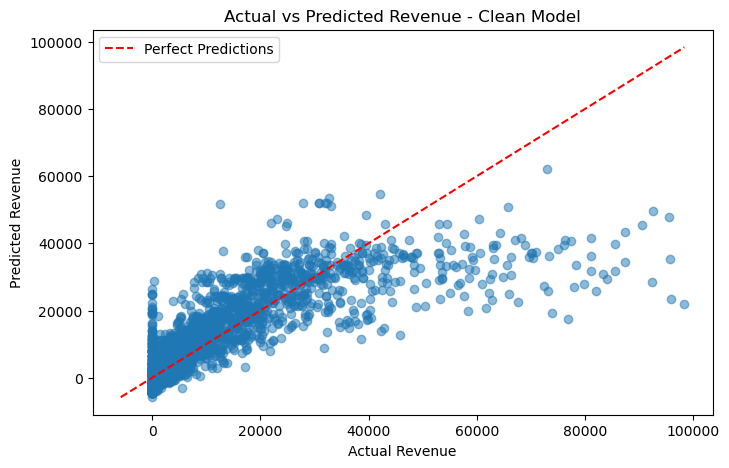

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions_clean, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue - Clean Model')

# Perfect prediction line
min_val = min(y_test.min(), predictions_clean.min())
max_val = max(y_test.max(), predictions_clean.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Predictions')
plt.legend()
plt.show()